# Value at Risk Analysis with Confidence Intervals 

In [ ]:
!pip3 install numpy-financial
!pip3 install pandas
!pip3 install numpy
!pip3 install pandas-datareader
!pip3 install yfinance
!pip3 install quandl
!pip3 install scipy


# Load Libraries

In [ ]:
import numpy as np
import pandas as pd
import numpy_financial as npf
import datetime
import matplotlib.pyplot as plt
import yfinance as yf

%matplotlib inline

# Get Riskfree Rate from FRED

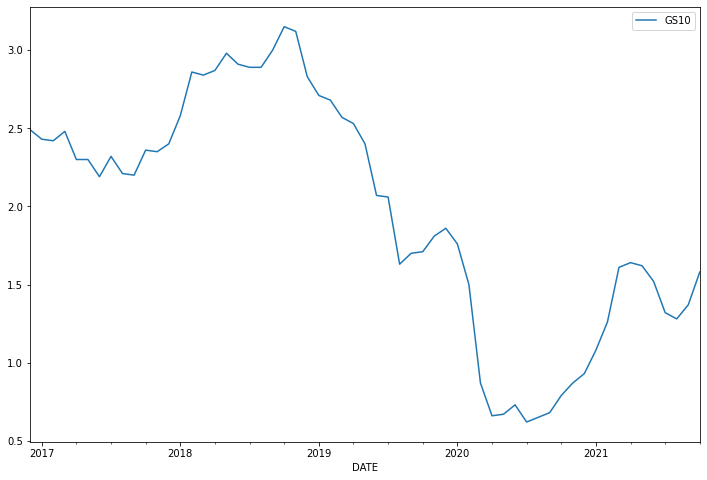

In [ ]:
from pandas_datareader import data, wb
import pandas_datareader as pdr
import datetime

# US Treasury https://fred.stlouisfed.org/series/GS10
f = pdr.get_data_fred('GS10')
f.plot(figsize=(12,8))

# Get Data from Yahoo

[*********************100%***********************]  1 of 1 completed


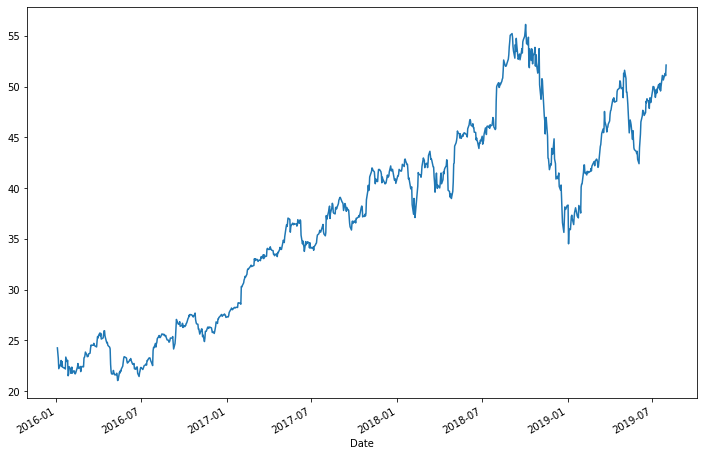

In [ ]:
# Import the yfinance. If you get module not found error the run !pip install yfiannce from your Jupyter notebook
import yfinance as yf
# Get the data of the stock AAPL
data = yf.download('AAPL','2016-01-01','2019-08-01')

# Plot the close price of the AAPL
data['Adj Close'].plot(figsize=(12,8))
plt.show()

# Get Stocks from Yahoo

Get: BHP
[*********************100%***********************]  1 of 1 completed
Get: PBR
[*********************100%***********************]  1 of 1 completed
Get: TTE
[*********************100%***********************]  1 of 1 completed
Get: COP
[*********************100%***********************]  1 of 1 completed
Get: BTU
[*********************100%***********************]  1 of 1 completed
Get: VALE
[*********************100%***********************]  1 of 1 completed
Get: GLNCY
[*********************100%***********************]  1 of 1 completed
Get: ADM
[*********************100%***********************]  1 of 1 completed
Get: RDS-B
[*********************100%***********************]  1 of 1 completed
Get: RDS-A
[*********************100%***********************]  1 of 1 completed
Get: BP
[*********************100%***********************]  1 of 1 completed
Get: GAZ.DE
[*********************100%***********************]  1 of 1 completed


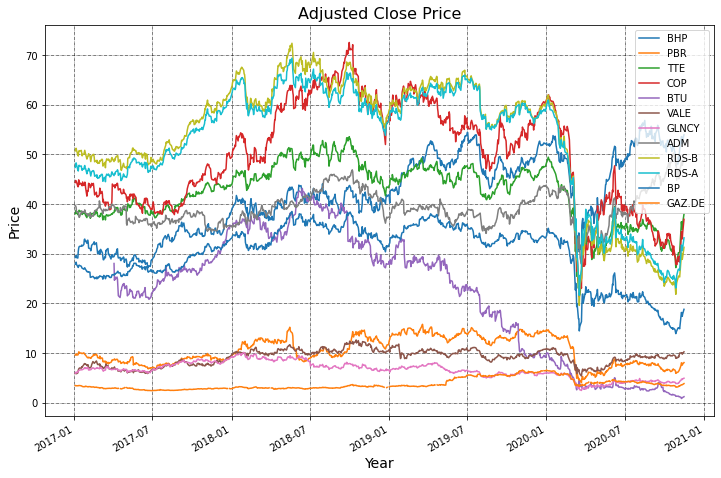

,BHP,PBR,TTE,COP,BTU,VALE,GLNCY,ADM,RDS-B,RDS-A,BP,GAZ.DE
Date,,,,,,,,,,,,
2017-01-03,29.265860,9.599165,38.063515,44.347244,NaN,5.872125,5.934244,39.687405,50.731838,47.403625,27.887905,3.441767
2017-01-04,29.384443,9.572576,38.250580,44.759083,NaN,5.872125,5.959896,39.618660,51.025192,47.884354,28.100739,3.468242
2017-01-05,29.661127,9.838479,38.721981,44.627647,NaN,6.054489,6.165116,39.326519,51.240887,48.304996,28.306231,3.392997
2017-01-06,29.218428,9.634619,38.273029,44.461159,NaN,5.828358,6.036853,38.424343,50.826752,47.892933,27.821856,3.406931
2017-01-09,29.131470,9.599165,37.868973,43.514812,NaN,5.996133,6.148014,38.450115,49.894943,46.871384,27.381521,3.394391


In [ ]:
companies = ['BHP', 'PBR', 'TTE', 'COP', 'BTU', 'VALE', 'GLNCY', 'ADM', 'RDS-B', 'RDS-A', 'BP', 'GAZ.DE']

start  = '2017-01-01'
end = '2020-11-17'

data = pd.DataFrame(columns=companies)

for company in companies:
  print ("Get: " + company)
  data[company] = yf.download(company, start, end)['Adj Close'] 
  data[company].plot(figsize=(12,8))

plt.title('Adjusted Close Price', fontsize=16)
plt.legend()
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.grid(which='major', color='k', linestyle='-.', linewidth=0.5)
plt.show()

data.head()

In [ ]:
# floating average
name = 'BHP'
sheet = pd.DataFrame(data[name])
for i in range(0,sheet.shape[0]-2):
    sheet.loc[sheet.index[i+2],name+"_3"] = (sheet[name][i] + sheet[name][i+1] + sheet[name][i+2])/3

sheet.head()


,BHP,BHP_3
Date,,
2016-01-04,19.723827,NaN
2016-01-05,19.561266,NaN
2016-01-06,18.392389,19.225828
2016-01-07,17.386072,18.446576
2016-01-08,16.999025,17.592496


# Prepare Data and Set Percentage

In [ ]:
#name = 'BHP'

sheet = pd.DataFrame(data)

for name in companies:
 
  for i in range(0,sheet.shape[0]-1):
    sheet.loc[sheet.index[i+1],name+"_R"] = sheet[name][i] / sheet[name][i+1]-1

#sheet.head()
compression_opts = dict(method='zip', archive_name='out.csv')  
sheet.to_csv('out.zip', index=False, compression=compression_opts)

# Prepare Data in independant DataFrame

In [ ]:
from scipy import stats

sheet = pd.DataFrame(data)
sheet_r = pd.DataFrame()
average = pd.DataFrame(columns=['mean'],  index=companies)

for name in companies:
 
  for i in range(0,sheet.shape[0]-1):
    sheet_r.loc[sheet.index[i+1],name] = sheet[name][i] / sheet[name][i+1]-1

  average.loc[name]['mean'] =  sheet_r[name].mean()

print(average['mean'].mean())

sheet_r.head()
# sheet_r

0.0006853382075637007


,BHP,PBR,TTE,COP,BTU,VALE,GLNCY,ADM,RDS-B,RDS-A,BP,GAZ.DE
2017-01-04,-0.004036,0.002778,-0.004891,-0.009201,NaN,0.000000,-0.004304,0.001735,-0.005749,-0.010039,-0.007574,-0.007634
2017-01-05,-0.009328,-0.027027,-0.012174,0.002945,NaN,-0.030120,-0.033287,0.007429,-0.004209,-0.008708,-0.007260,0.022177
2017-01-06,0.015151,0.021159,0.011730,0.003745,NaN,0.038798,0.021247,0.023479,0.008148,0.008604,0.017410,-0.004090
2017-01-09,0.002985,0.003693,0.010670,0.021748,NaN,-0.027980,-0.018081,-0.000670,0.018675,0.021795,0.016081,0.003695
2017-01-10,-0.044347,-0.017241,-0.000198,0.000000,NaN,-0.082589,-0.028378,0.006523,0.004342,0.004230,0.005389,-0.013366


# Get the portfolio average

In [ ]:

average_r = pd.DataFrame(sheet_r,columns=companies)

average_r['portfolio_avg'] = average_r.mean(axis=1)

p_average = average_r['portfolio_avg'].mean()

print(average_r['portfolio_avg'].mean())

average_r.head(-1)


0.0006562413063226302


,BHP,PBR,TTE,COP,BTU,VALE,GLNCY,ADM,RDS-B,RDS-A,BP,GAZ.DE,portfolio_avg
2017-01-04,-0.004036,0.002778,-0.004891,-0.009201,NaN,0.000000,-0.004304,0.001735,-0.005749,-0.010039,-0.007574,-0.007634,-0.004447
2017-01-05,-0.009328,-0.027027,-0.012174,0.002945,NaN,-0.030120,-0.033287,0.007429,-0.004209,-0.008708,-0.007260,0.022177,-0.009051
2017-01-06,0.015151,0.021159,0.011730,0.003745,NaN,0.038798,0.021247,0.023479,0.008148,0.008604,0.017410,-0.004090,0.015035
2017-01-09,0.002985,0.003693,0.010670,0.021748,NaN,-0.027980,-0.018081,-0.000670,0.018675,0.021795,0.016081,0.003695,0.004783
2017-01-10,-0.044347,-0.017241,-0.000198,0.000000,NaN,-0.082589,-0.028378,0.006523,0.004342,0.004230,0.005389,-0.013366,-0.015058
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-09,-0.038418,-0.100122,-0.132514,-0.125524,0.083333,-0.002542,-0.045064,-0.020694,-0.116230,-0.117764,-0.134956,-0.058745,-0.067437
2020-11-10,-0.009513,-0.068259,-0.041976,-0.060512,0.299639,0.005968,-0.048980,-0.017149,-0.049436,-0.048174,-0.053403,-0.014474,-0.008856
2020-11-11,0.001307,0.001139,0.025459,0.007086,-0.076667,-0.009291,-0.002037,0.001198,0.014132,0.011787,0.011653,0.007423,-0.000567
2020-11-12,0.027442,0.060387,0.018172,0.037342,-0.087221,0.030461,0.016563,0.015406,0.029799,0.024812,0.032823,-0.007107,0.016573


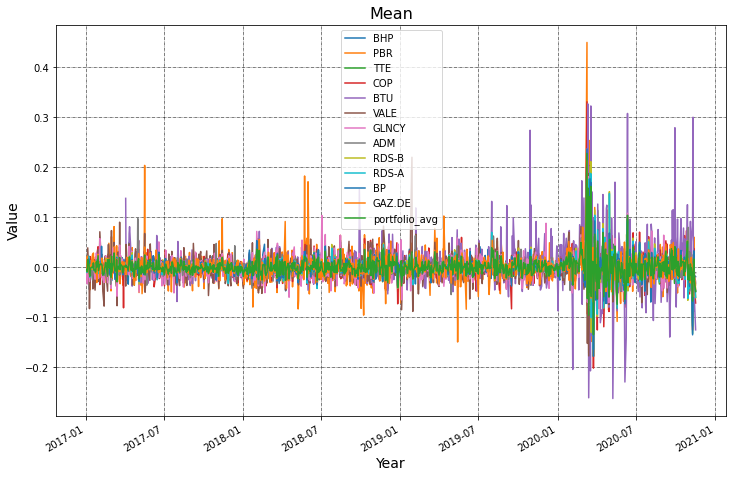

In [ ]:
average_r.plot(figsize=(12,8))

plt.title('Mean', fontsize=16)
plt.legend()
plt.ylabel('Value', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.grid(which='major', color='k', linestyle='-.', linewidth=0.5)
plt.show()

# Covariance Dataframe

In [ ]:
df = pd.DataFrame(sheet_r, columns=companies)

covMatrix = pd.DataFrame.cov(df)

print(covMatrix)


             BHP       PBR       TTE  ...     RDS-A        BP    GAZ.DE
BHP     0.000421  0.000490  0.000310  ...  0.000335  0.000320  0.000215
PBR     0.000490  0.001368  0.000514  ...  0.000580  0.000562  0.000411
TTE     0.000310  0.000514  0.000446  ...  0.000421  0.000405  0.000211
COP     0.000382  0.000704  0.000426  ...  0.000496  0.000486  0.000304
BTU     0.000419  0.000676  0.000374  ...  0.000423  0.000409  0.000263
VALE    0.000438  0.000697  0.000340  ...  0.000349  0.000337  0.000246
GLNCY   0.000424  0.000539  0.000363  ...  0.000378  0.000359  0.000260
ADM     0.000188  0.000294  0.000178  ...  0.000186  0.000181  0.000121
RDS-B   0.000341  0.000604  0.000426  ...  0.000535  0.000475  0.000254
RDS-A   0.000335  0.000580  0.000421  ...  0.000519  0.000459  0.000242
BP      0.000320  0.000562  0.000405  ...  0.000459  0.000479  0.000233
GAZ.DE  0.000215  0.000411  0.000211  ...  0.000242  0.000233  0.000424

[12 rows x 12 columns]


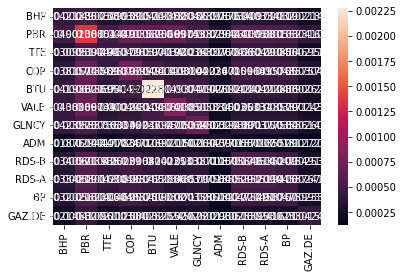

In [ ]:
import seaborn as sn
sn.heatmap(covMatrix, annot=True, fmt='g')
plt.show()

# Variance Portfolio

In [ ]:
import math

weights = np.array(
     [[ 0.083],
      [ 0.083],
      [ 0.083],
      [ 0.083],
      [ 0.083],
      [ 0.083],
      [ 0.083],
      [ 0.083],
      [ 0.083],
      [ 0.083],
      [ 0.083],
      [ 0.083]])

p_var = np.dot(weights.T,np.dot(covMatrix,weights))
p_sdev = math.sqrt(p_var)

print(p_var)
print(p_sdev)

[[0.00040971]]
0.020241197652976627


# Z-stat, VCV VaR

In [ ]:
import scipy.stats as st

perc = [0.90,0.95,0.975,0.99]
risk = pd.DataFrame(index=perc, columns=['Z ppf','Z cdf'])

print("Average : " + str(p_average))
print("Variance: " + str(p_var))
print("S.Dev   : " + str(p_sdev))

for i in perc:
  risk.loc[i,'Z ppf'] = st.norm.ppf(i)
  risk.loc[i,'Z cdf'] = st.norm.cdf(st.norm.ppf(i))

risk['VCV VaR'] = risk['Z ppf']*p_sdev + p_average

risk.head()


Average : 0.0006562413063226302
Variance: [[0.00040971]]
S.Dev   : 0.020241197652976627


,Z ppf,Z cdf,VCV VaR
0.900,1.28155,0.9,0.0265964
0.950,1.64485,0.95,0.03395
0.975,1.95996,0.975,0.0403283
0.990,2.32635,0.99,0.0477443


# Percentile

In [ ]:
def quantile_exc(ser, q):
    ser_sorted = ser.sort_values()
    rank = q * (len(ser) + 1) - 1
    assert rank > 0, 'quantile is too small'
    rank_l = int(rank)
    return ser_sorted.iat[rank_l] + (ser_sorted.iat[rank_l + 1] - ser_sorted.iat[rank_l]) * (rank - rank_l)

perc = [0.90,0.95,0.975,0.99]
ser = average_r['portfolio_avg']
hs_risk = pd.DataFrame(risk)

for i in perc:
  hs_risk.loc[i,'HS VaR'] = quantile_exc(ser, i)
 

# Value (Loss)


In [ ]:
invest = 10000

pf = pd.DataFrame(hs_risk)
pf['VCV VaR Value'] = pf['VCV VaR']*invest
pf['HS VaR Value'] = pf['HS VaR']*invest

pf.head()

,Z ppf,Z cdf,VCV VaR,HS VaR,HS VaR Value,VCV VaR Value
0.900,1.28155,0.9,0.0265964,0.019130,191.300895,265.964
0.950,1.64485,0.95,0.03395,0.026947,269.473000,339.5
0.975,1.95996,0.975,0.0403283,0.035861,358.605691,403.283
0.990,2.32635,0.99,0.0477443,0.054565,545.651287,477.443
